https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a
Kmeans on Image Compression
In this part, we’ll implement kmeans to compress an image. The image that we’ll be working on is 396 x 396 x 3. Therefore, for each pixel location we would have 3 8-bit integers that specify the red, green, and blue intensity values. Our goal is to reduce the number of colors to 30 and represent (compress) the photo using those 30 colors only. To pick which colors to use, we’ll use kmeans algorithm on the image and treat every pixel as a data point. That means reshape the image from height x width x channels to (height * width) x channel, i,e we would have 396 x 396 = 156,816 data points in 3-dimensional space which are the intensity of RGB. Doing so will allow us to represent the image using the 30 centroids for each pixel and would significantly reduce the size of the image by a factor of 6. The original image size was 396 x 396 x 24 = 3,763,584 bits; however, the new compressed image would be 30 x 24 + 396 x 396 x 4 = 627,984 bits. The huge difference comes from the fact that we’ll be using centroids as a lookup for pixels’ colors and that would reduce the size of each pixel location to 4-bit instead of 8-bit.

In [59]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.image import imread
from sklearn.cluster import KMeans
from PIL import Image
from numpy import asarray
%matplotlib inline

In [68]:
# test_pic="image.png"
test_pic="monalisa1.jpg"
# img = imread(test_pic)
image=Image.open(test_pic)
img=asarray(image) # use this way to load png file; use imread to load png file it will be float
img_size = img.shape

If we use matplotlib.image.imread to read pic, it will read jpg file into int, while reading png into float. Couldn't find good documentation how to read png into int. 
Then change to Pillow to read to "Image" then convert to numpy array using np.asarray. 

In [72]:
X = img.reshape(img_size[0] * img_size[1], img_size[2]) #reshape image to flat
print(X)
no_cluster=10 # number of clusters = K
km = KMeans(n_clusters=no_cluster) # Initialize KMeans
km.fit(X)
# Use the centroids to compress the image
X_compressed = km.cluster_centers_[km.labels_]
X_compressed = np.clip(X_compressed.astype('uint8'), 0, 255)

'''numpy.clip(a, a_min, a_max, out=None, **kwargs)[source]
a = np.arange(10)
np.clip(a, 1, 8)x
array([1, 1, 2, 3, 4, 5, 6, 7, 8, 8])
'''

# Reshape X_recovered to have the same dimension as the original image 128 * 128 * 3
X_compressed = X_compressed.reshape(img_size[0], img_size[1], img_size[2])


[[ 91 108  98]
 [ 99 116 106]
 [107 124 116]
 ...
 [  1   5   8]
 [  1   5   8]
 [  1   5   8]]


image file is basically 3 dimension array (width, lenth, and then 3 columns: R, G, B). We can imagine the picture is first with 2 dimension array of width and length, and each Pixel with position reading from this two dimension array; then each Pixel has a turple value (R,G,B) to tell what the color is. The RGB value is in range (0,255). 

To cluster the pixel's color, we need transform the width and length dimension to one dimension array, so it is width * length, which is done by X = img.reshape(img_size[0] * img_size[1], img_size[2]. This way, we are dealing with a new array of size (width*length) and then with 3 columns: R, G, B.

KMeans.cluster_centers_ is also an array, shape=no_cluster * 3, which means each centroid is RGB value representative, and we want to use that centroid node's color to represent all other node's color within that cluster. 

KMeans.labels_ is a one dimension array of length = original picture's width * length. Each value of it is from [1, no_cluster], which means each pixel will fetch the centroid based on index value, so that we know which color will be replaced in this pixel. 

KMeans.cluster_centers_ is like array[[91,109,89],...[1,5,8]], while KMeans.labels_ is like array [1,2,10,.... 9]. By doing X_compressed = km.cluster_centers_[km.labels_], it is like below:

In [83]:
c=np.array([2,3,4,5,1,4,3,4,3,1,4,3,4,1,4,5])
print("c is\n",c)
print("=========================")
b=np.random.rand(6,3)
print("b is\n ",b)
print("=========================")
print("b[c] is\n",b[c])
# c=np.array([2,3,4,5,1,4,3,4,3,1,4,3,4,1,4,5]) # the value of c can not over b's number of rows. 
# b=np.random.rand(6,3)
# >>> b
# array([[0.96498273, 0.81239665, 0.2470676 ],
#        [0.05591573, 0.99088634, 0.24020769],
#        [0.04329421, 0.71281959, 0.27511776],
#        [0.30295881, 0.32787144, 0.76419773],
#        [0.77848164, 0.06680992, 0.6156935 ],
#        [0.28521497, 0.33891013, 0.00960647]])
# >>> b[c]
# array([[0.04329421, 0.71281959, 0.27511776],
#        [0.30295881, 0.32787144, 0.76419773],
#        [0.77848164, 0.06680992, 0.6156935 ],
#        [0.28521497, 0.33891013, 0.00960647],
#        [0.05591573, 0.99088634, 0.24020769],
#        [0.77848164, 0.06680992, 0.6156935 ],
#        [0.30295881, 0.32787144, 0.76419773],
#        [0.77848164, 0.06680992, 0.6156935 ],
#        [0.30295881, 0.32787144, 0.76419773],
#        [0.05591573, 0.99088634, 0.24020769],
#        [0.77848164, 0.06680992, 0.6156935 ],
#        [0.30295881, 0.32787144, 0.76419773],
#        [0.77848164, 0.06680992, 0.6156935 ],
#        [0.05591573, 0.99088634, 0.24020769],
#        [0.77848164, 0.06680992, 0.6156935 ],
#        [0.28521497, 0.33891013, 0.00960647]])

c is
 [2 3 4 5 1 4 3 4 3 1 4 3 4 1 4 5]
b is
  [[0.85983145 0.25222867 0.02340111]
 [0.82655905 0.80128734 0.83493173]
 [0.01817893 0.64987559 0.4190797 ]
 [0.10836948 0.40150688 0.59126363]
 [0.59367641 0.38069116 0.82918134]
 [0.02770242 0.62288968 0.46228432]]
b[c] is
 [[0.01817893 0.64987559 0.4190797 ]
 [0.10836948 0.40150688 0.59126363]
 [0.59367641 0.38069116 0.82918134]
 [0.02770242 0.62288968 0.46228432]
 [0.82655905 0.80128734 0.83493173]
 [0.59367641 0.38069116 0.82918134]
 [0.10836948 0.40150688 0.59126363]
 [0.59367641 0.38069116 0.82918134]
 [0.10836948 0.40150688 0.59126363]
 [0.82655905 0.80128734 0.83493173]
 [0.59367641 0.38069116 0.82918134]
 [0.10836948 0.40150688 0.59126363]
 [0.59367641 0.38069116 0.82918134]
 [0.82655905 0.80128734 0.83493173]
 [0.59367641 0.38069116 0.82918134]
 [0.02770242 0.62288968 0.46228432]]


It's like b = dimension 6 x 3, c dimention is 1x16, then b[c] has dimension 16*3
This is called numpy integer array indexing
https://numpy.org/doc/stable/reference/arrays.indexing.html#integer-array-indexing

By doing above, we have transformed the original image to a new one with replaced RGB color value using the centroid color, of which the cluster it belongs to. 

Next we use np.clip to limit the value to range (0,255), and reshape it to image. 

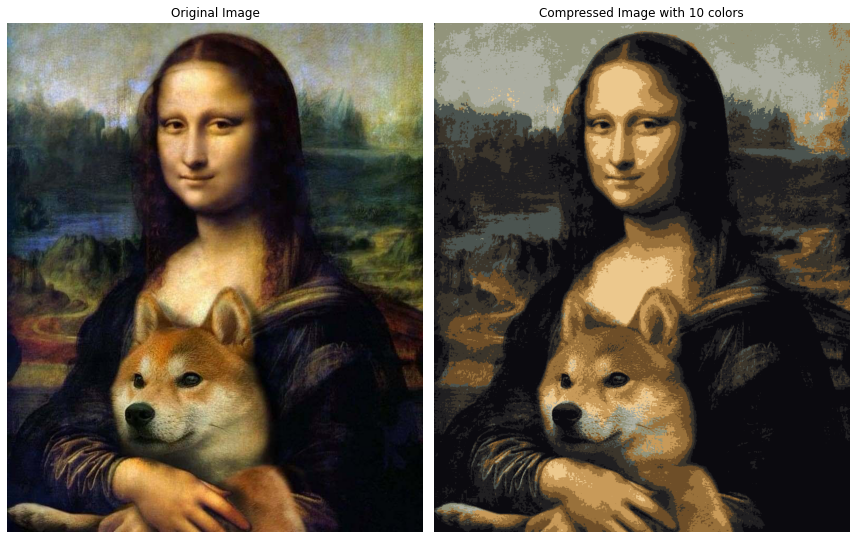

In [73]:
# Plot the original and the compressed image next to each other
fig, ax = plt.subplots(1, 2, figsize = (12, 8))
ax[0].imshow(img)
ax[0].set_title('Original Image')
ax[1].imshow(X_compressed)
ax[1].set_title('Compressed Image with '+str(no_cluster)+' colors')
for ax in fig.axes:
    ax.axis('off')
plt.tight_layout()


In [74]:
im = Image.fromarray(X_compressed)
im.save("compressed_"+test_pic)


Only question is, certainly there is an optimum cluster size. It's found for the above "monalisa" jpg file, the processed image size won't always be smaller than original size. 